In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ratat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# загружаем датасет
df = pd.read_pickle('df.pkl')

In [8]:
# выделяем необходимые данные
titles = list(df["title"])
categories = list(df["category"])
titles

['WE WANT TO TALK ABOUT OUR MARRIAGE',
 'The Trump Presidency: Last Week Tonight with John Oliver (HBO)',
 'Racist Superman | Rudy Mancuso, King Bach & Lele Pons',
 'Nickelback Lyrics: Real or Fake?',
 'I Dare You: GOING BALD!?',
 '2 Weeks with iPhone X',
 'Roy Moore & Jeff Sessions Cold Open - SNL',
 '5 Ice Cream Gadgets put to the Test',
 'The Greatest Showman | Official Trailer 2 [HD] | 20th Century FOX',
 'Why the rise of the robots won’t mean the end of work',
 "Dion Lewis' 103-Yd Kick Return TD vs. Denver! | Can't-Miss Play | NFL Wk 10 Highlights",
 "(SPOILERS) 'Shiva Saves the Day' Talked About Scene Ep. 804 | The Walking Dead",
 'Marshmello - Blocks (Official Music Video)',
 'Which Countries Are About To Collapse?',
 'SHOPPING FOR NEW FISH!!!',
 'The New SpotMini',
 'One Change That Would Make Pacific Rim a Classic',
 "How does your body know you're full? - Hilary Coller",
 'HomeMade Electric Airplane',
 'Founding An Inbreeding-Free Space Colony',
 'How Can You Control Your Dre

In [9]:
# обработка строк
stemmer = WordNetLemmatizer()
for i in range(len(titles)):
    # нормализация при помощи регулярных выражений
    titles[i] = re.sub(r'\W', ' ', titles[i])
    titles[i] = re.sub(r'\s+[a-zA-Z]\s+', ' ', titles[i])
    titles[i] = re.sub(r'\^s+[a-zA-Z]', ' ', titles[i])
    titles[i] = re.sub(r'\s+', ' ', titles[i])
    
    # все буквы маленькие
    titles[i] = titles[i].lower()
    
    # лемматизация
    titles[i] = titles[i].split()
    titles[i] = [stemmer.lemmatize(word) for word in titles[i]]
    titles[i] = ' '.join(titles[i])
titles

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\ratat/nltk_data'
    - 'D:\\Anaconda3\\nltk_data'
    - 'D:\\Anaconda3\\share\\nltk_data'
    - 'D:\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ratat\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [5]:
# превращаем строки в данные для обучения
vectorizer = TfidfVectorizer(max_features = 1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(titles).toarray()
x_train, x_test, y_train, y_test = train_test_split(x, categories, test_size=0.2, random_state=0)

In [6]:
# наивный классификатор Байеса (как основа для сравнения)
clf_bayes = MultinomialNB()
clf_bayes.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
# linear support vector machine
clf = LinearSVC()
clf.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [8]:
# проверка Байеса
pred_bayes = clf_bayes.predict(x_test)
print(classification_report(y_test, pred_bayes))

                       precision    recall  f1-score   support

     Autos & Vehicles       1.00      0.10      0.19        77
               Comedy       0.74      0.55      0.63       703
            Education       0.77      0.38      0.51       365
        Entertainment       0.54      0.81      0.65      1928
     Film & Animation       0.84      0.61      0.70       484
               Gaming       0.91      0.51      0.65       151
        Howto & Style       0.70      0.78      0.73       850
                Music       0.80      0.89      0.84      1285
      News & Politics       0.77      0.61      0.68       498
Nonprofits & Activism       0.00      0.00      0.00        11
       People & Blogs       0.64      0.42      0.50       619
       Pets & Animals       0.84      0.59      0.69       197
 Science & Technology       0.73      0.63      0.68       488
                Shows       1.00      0.67      0.80        12
               Sports       0.84      0.73      0.79  

c:\users\igrli\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


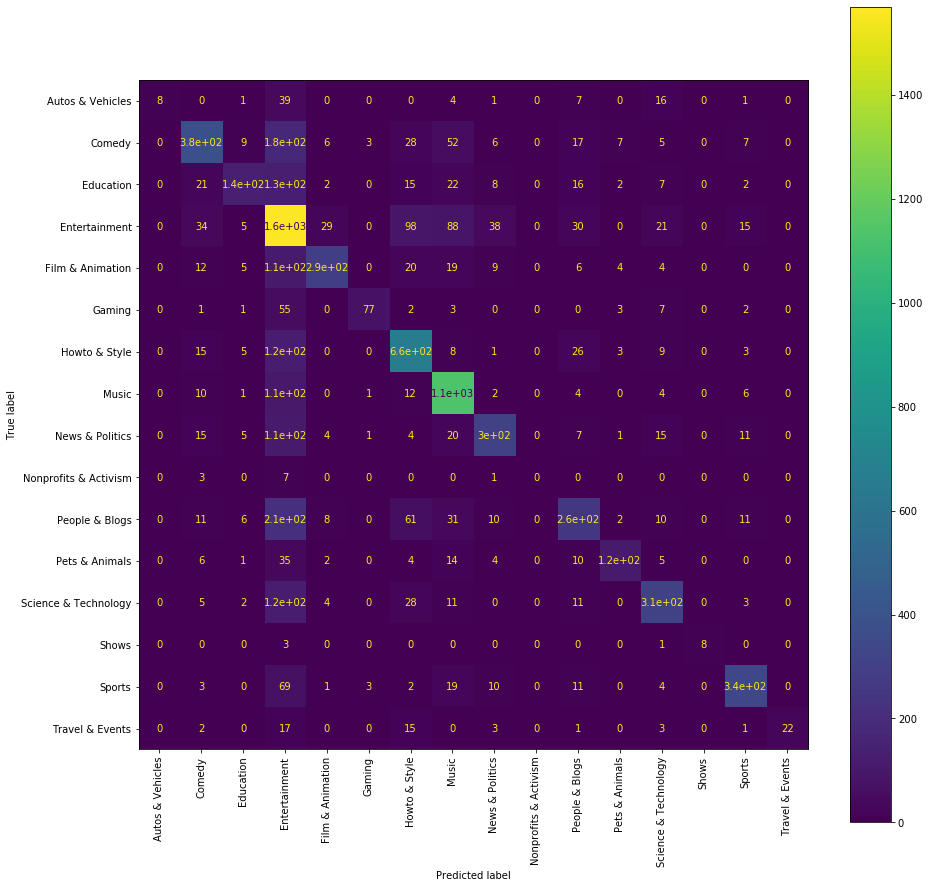

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf_bayes, x_test, y_test, xticks_rotation='vertical', ax=ax)
plt.show()

In [10]:
# вроверка linearsvc
pred = clf.predict(x_test)
print(classification_report(y_test, pred))

                       precision    recall  f1-score   support

     Autos & Vehicles       0.88      0.83      0.85        77
               Comedy       0.67      0.80      0.73       703
            Education       0.84      0.70      0.76       365
        Entertainment       0.82      0.85      0.83      1928
     Film & Animation       0.89      0.81      0.84       484
               Gaming       0.92      0.88      0.90       151
        Howto & Style       0.87      0.88      0.88       850
                Music       0.92      0.93      0.93      1285
      News & Politics       0.85      0.85      0.85       498
Nonprofits & Activism       0.89      0.73      0.80        11
       People & Blogs       0.76      0.68      0.72       619
       Pets & Animals       0.89      0.90      0.89       197
 Science & Technology       0.83      0.79      0.81       488
                Shows       1.00      1.00      1.00        12
               Sports       0.97      0.90      0.94  

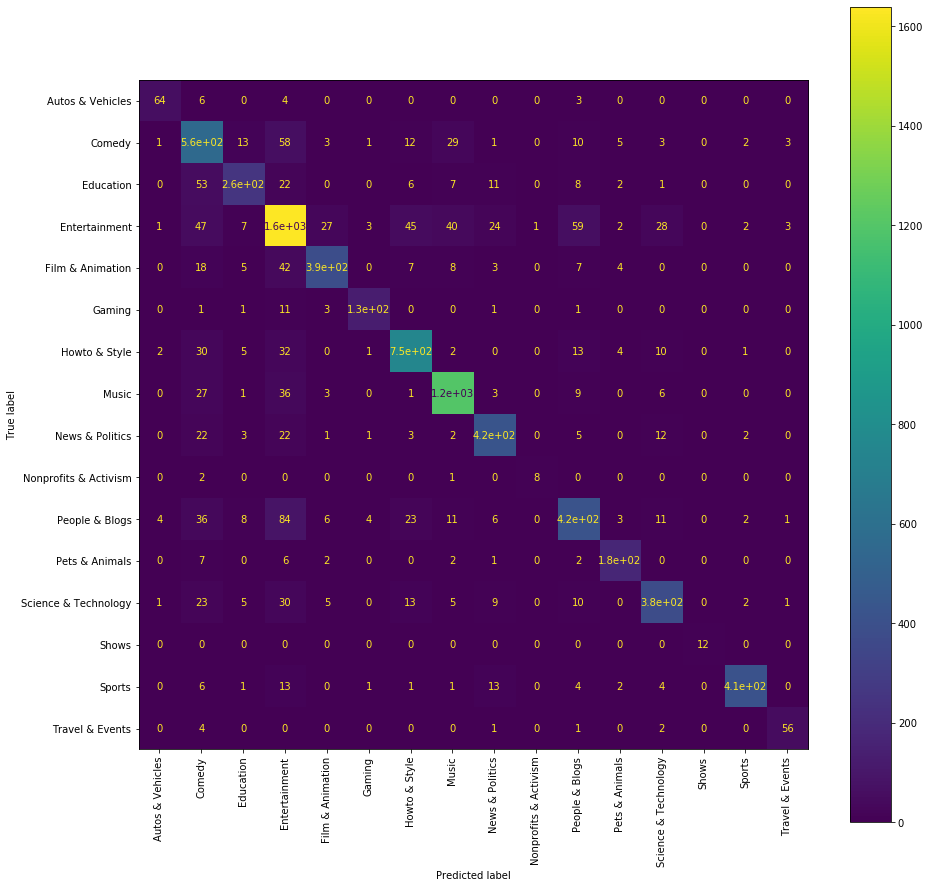

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf, x_test, y_test, xticks_rotation='vertical', ax=ax)
plt.show()